In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import shap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Bidirectional, Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

from preprocessing import preprocessing # Module preprocessing

# Loading Data

In [3]:
from preprocessing import gives_initial_features

X_init = gives_initial_features()

In [6]:
def barh_plot(table, size = (10,6)):
    """
    This function draws the bar chart of a given table
    Input : table
    Output : bar plot -> DataFrame, x_label -> string, y_label -> string
    """
    ax = table.plot(kind='barh', figsize=size, color='b', zorder=2, width=0.85)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    
    plt.show()

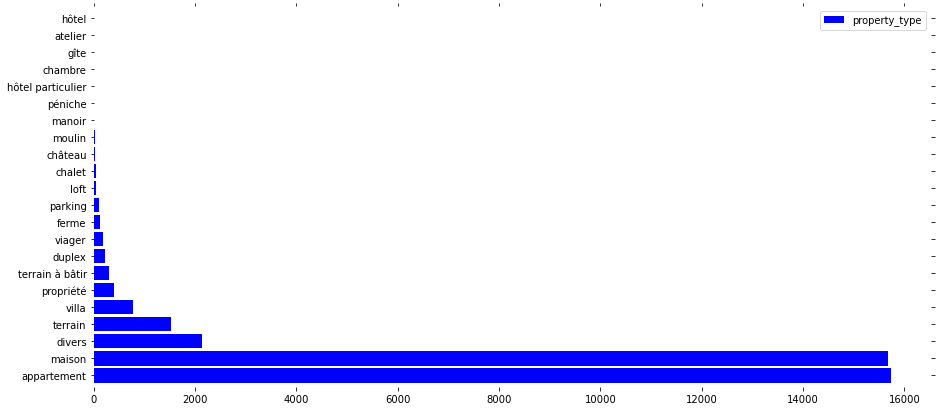

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

barh_plot(pd.DataFrame(X_init['property_type'].value_counts()), (15,7))

In [2]:
#  load data from the preprocessing module    
X, Y = preprocessing()

In [3]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 100, shuffle = True)

In [4]:
# Initialize k-fold for doing cross validation
kfold = KFold(n_splits = 5, shuffle = False, random_state = None)

# Random Forest Pipeline Model

In [5]:
# Build random Forest Pipeline Model
rf = {}

rf['pipeline'] = Pipeline([('rf' , RandomForestRegressor(random_state = 100, n_jobs = -1))])

# Dictionary containing the values of the hyperparameters to be tested
rf['hyperparametres'] = {}
rf['hyperparametres']['rf__max_features'] = ["auto", "sqrt"]
rf['hyperparametres']['rf__n_estimators'] = [50, 100, 300, 500]
rf['hyperparametres']['rf__max_depth'] = [30, 70, None]

# Grille for the random forest model
rf['gridsearch'] = GridSearchCV(estimator = rf['pipeline'], 
                                param_grid = rf['hyperparametres'], 
                                scoring = 'neg_mean_absolute_error',
                                cv = kfold)

In [ ]:
# training the pipeline
rf['gridsearch'].fit(X_train, y_train.values.ravel())

In [ ]:
def Parametres_scores(x):
    """"
    This function allow us to print the score of our model with the different hyperparameters
    """
    
    means = x.cv_results_['mean_test_score']
    stds = x.cv_results_['std_test_score']

    for (mean, std, params) in zip(means, stds, x.cv_results_['params']):
        print(f'MAE : {round(mean, 3)} (std : +/- {round(std*2, 3)}) for {params}')


In [ ]:
Parametres_scores(rf['gridsearch'])

MAE : -95713.83 (std : +/- 1622.282) for {'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__n_estimators': 50}
MAE : -95030.281 (std : +/- 1975.172) for {'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__n_estimators': 100}
MAE : -94512.847 (std : +/- 2282.654) for {'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__n_estimators': 300}
MAE : -94314.592 (std : +/- 2208.348) for {'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__n_estimators': 500}
MAE : -105523.311 (std : +/- 2389.986) for {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__n_estimators': 50}
MAE : -104625.355 (std : +/- 2397.303) for {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__n_estimators': 100}
MAE : -103952.743 (std : +/- 2889.324) for {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__n_estimators': 300}
MAE : -103922.994 (std : +/- 2931.766) for {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__n_estimators': 500}
MAE : -95656.6 (std : +/- 1674.378) for {'rf__max_depth': 70, '

In [ ]:
print(f"Best Params: {rf['gridsearch'].best_params_} --- Best score MAE : {rf['gridsearch'].best_score_} ")

Best Params: {'rf__max_depth': 30, 'rf__max_features': 'auto', 'rf__n_estimators': 500} --- Best score MAE : -94314.59243474607 


In [ ]:
model_rf  = rf['gridsearch'].best_estimator_.fit(X_train, y_train.values.ravel())

In [ ]:
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score}')

mse = 25038764281.024094
rmse = 158236.4189465374
mae = 90681.00262888055
explained_var = 0.7423736679952994
r2_score = 0.7423103052015618


In [ ]:
# save the model
pickle.dump(model_rf, open(r"C:\Users\modfa\Documents\NEOMA\DS Remi Perrier\Project\pkl_file\model_rf.pkl", 'wb'))

In [11]:
def load_model(model_name):
    """
    This function load the model
    """
    # load the model
    pickled_model = pickle.load(open(model_name, 'rb'))
    return pickled_model


In [15]:
model_rf = r"C:\Users\modfa\Documents\NEOMA\DS Remi Perrier\Project\pkl_file\model_rf.pkl"
pickled_model_rf = load_model(model_rf)

In [ ]:
def predict(input_features):
    """
    This functions predict the price of a given property type
    input : pd.DataFrame 
    output : dict
    """
    pickled_model = pickled_model_rf
    # id_annonce
    index_val = input_features.index.values
    # predicted price
    predict_val = pickled_model.predict(input_features)
    return {'id_annonce' : index_val[0], 'Price (€)' : int(predict_val[0])}


In [ ]:
    for i in range(10):
        input_val = pd.DataFrame(X_test.iloc[i]).T
        print(predict(input_val))

{'id_annonce': 35874849, 'Price (€)': 950805}
{'id_annonce': 36035515, 'Price (€)': 308430}
{'id_annonce': 35797493, 'Price (€)': 168312}
{'id_annonce': 35942147, 'Price (€)': 167338}
{'id_annonce': 35838227, 'Price (€)': 140102}
{'id_annonce': 35829507, 'Price (€)': 366417}
{'id_annonce': 35835439, 'Price (€)': 147681}
{'id_annonce': 17016147, 'Price (€)': 1190953}
{'id_annonce': 35832109, 'Price (€)': 246876}
{'id_annonce': 36047047, 'Price (€)': 312861}


# Gradient Boosting Pipeline Model

In [ ]:

gb = {}

gb['Pipeline'] = Pipeline([('gb', XGBRegressor(random_state = 100))])

gb['Hyperparametres'] = {}
gb['Hyperparametres']['gb__n_estimators'] = [100, 400, 800]
gb['Hyperparametres']['gb__max_depth'] = [3, 9]
gb['Hyperparametres']['gb__learning_rate'] = [0.01, 0.1]

# Grille pour le gb
gb['gridsearch'] = GridSearchCV(estimator = gb['Pipeline'], 
                                param_grid = gb['Hyperparametres'], 
                                scoring = 'neg_mean_absolute_error',
                                cv = kfold)

In [ ]:
gb['gridsearch'].fit(X_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('gb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     gamma=None, gpu_id=None,
                                                     grow_policy=None,
                                                     importance_type=N

In [ ]:
Parametres_scores(gb['gridsearch'])

MAE : -170251.815 (std : +/- 5365.92) for {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 100}
MAE : -137556.862 (std : +/- 3037.652) for {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 400}
MAE : -126322.487 (std : +/- 2140.747) for {'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 800}
MAE : -150917.296 (std : +/- 5684.479) for {'gb__learning_rate': 0.01, 'gb__max_depth': 9, 'gb__n_estimators': 100}
MAE : -97354.897 (std : +/- 1984.672) for {'gb__learning_rate': 0.01, 'gb__max_depth': 9, 'gb__n_estimators': 400}
MAE : -91974.783 (std : +/- 1775.786) for {'gb__learning_rate': 0.01, 'gb__max_depth': 9, 'gb__n_estimators': 800}
MAE : -122560.259 (std : +/- 2134.769) for {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 100}
MAE : -110298.267 (std : +/- 2352.724) for {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 400}
MAE : -104410.348 (std : +/- 1855.27) for {'gb__learning_rate': 0.1, 'gb__max

In [ ]:
print(f"Best Params: {gb['gridsearch'].best_params_} --- Best score MAE : {gb['gridsearch'].best_score_} ")

Best Params: {'gb__learning_rate': 0.1, 'gb__max_depth': 9, 'gb__n_estimators': 800} --- Best score MAE : -86375.14987534216 


In [ ]:
# Train the best model
model_gb  = gb['gridsearch'].best_estimator_.fit(X_train, y_train.values.ravel())

In [9]:
# save the model
pickle.dump(model_gb, open(r"C:\Users\modfa\Documents\NEOMA\DS Remi Perrier\Project\pkl_file\model_gb.pkl", 'wb'))

In [26]:
# Load the model
model_gb = r"C:\Users\modfa\Documents\NEOMA\DS Remi Perrier\Project\pkl_file\model_gb.pkl"
pickled_model_gb = load_model(model_gb)

In [20]:
y_pred_gb = pickled_model_gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)
explained_var = explained_variance_score(y_test, y_pred_gb)
r2_score = r2_score(y_test, y_pred_gb)
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score}')

mse = 20794383615.71946
rmse = 144202.5783948382
mae = 82224.86913314056
explained_var = 0.7860065700182661
r2_score = 0.7859919001067721


# Neural Natwork Model

In [ ]:
input_size = X_train.shape[1]
callback = EarlyStopping(monitor = "loss" , patience = 10)
model = Sequential()
model.add(Dense(input_size, activation = "relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = 'mae' )

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.11, batch_size = 128, epochs=1000, verbose=1, callbacks=callback)

Epoch 1/1000
208/208 [==============================] - 2s 5ms/step - loss: 313919.0000 - val_loss: 272016.9062
Epoch 2/1000
208/208 [==============================] - 1s 5ms/step - loss: 251839.4375 - val_loss: 217773.3750
Epoch 3/1000
208/208 [==============================] - 1s 5ms/step - loss: 224043.6875 - val_loss: 207789.8906
Epoch 4/1000
208/208 [==============================] - 1s 4ms/step - loss: 218452.6094 - val_loss: 202538.0469
Epoch 5/1000
208/208 [==============================] - 1s 4ms/step - loss: 212584.0000 - val_loss: 196744.3750
Epoch 6/1000
208/208 [==============================] - 1s 3ms/step - loss: 203586.9844 - val_loss: 191709.0156
Epoch 7/1000
208/208 [==============================] - 1s 4ms/step - loss: 200577.1406 - val_loss: 185098.6875
Epoch 8/1000
208/208 [==============================] - 1s 4ms/step - loss: 196656.1562 - val_loss: 181967.2344
Epoch 9/1000
208/208 [==============================] - 1s 4ms/step - loss: 191261.3906 - val_loss: 1807

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 31)                992       
                                                                 
 dropout_15 (Dropout)        (None, 31)                0         
                                                                 
 flatten_5 (Flatten)         (None, 31)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               4096      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)               

Text(0.5, 1.0, 'Training and Validation Loss')

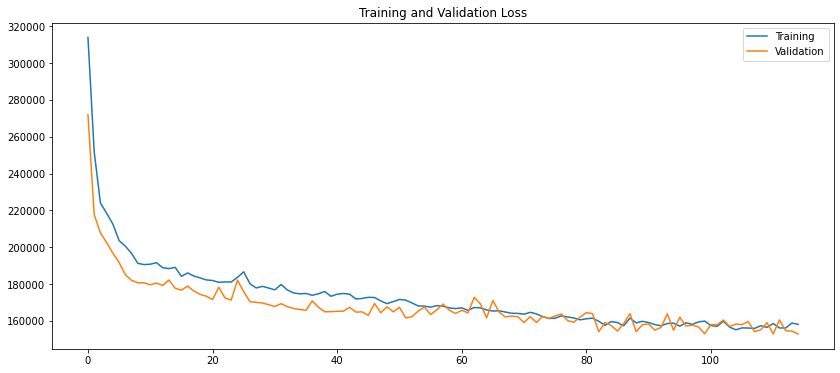

In [ ]:
plt.figure(figsize= (14,6))
plt.plot(model.history.history['loss'], label='Training')
plt.plot(model.history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')

In [ ]:
y_pred_nn = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae = mean_absolute_error(y_test, y_pred_nn)
explained_var = explained_variance_score(y_test, y_pred_nn)
r2_score = r2_score(y_test, y_pred_nn)
print(f'mse = {mse}\nrmse = {rmse}\nmae = {mae}\nexplained_var = {explained_var}\nr2_score = {r2_score}')

mse = 71674357502.64348
rmse = 267720.6706674766
mae = 153788.50386548368
explained_var = 0.3652955716064952
r2_score = 0.2623540402220309


In [ ]:
# save the model
#pickle.dump(model, open(r"C:\Users\modfa\Documents\NEOMA\DS Remi Perrier\Project\pkl_file\model_nn.pkl", 'wb'))

# Explainability

In [5]:
# model_gb = XGBRegressor(random_state = 100, n_estimators =  800, learning_rate =  0.1, max_depth = 9)
# model_gb = model_gb.fit(X, Y.values.ravel())

In [12]:
# Load the model
model_gb = r"C:\Users\modfa\Documents\NEOMA\DS Remi Perrier\Project\pkl_file\model_gb.pkl"
pickled_model_gb = load_model(model_gb)

In [14]:
explainer = shap.TreeExplainer(pickled_model_gb )
shap_values = explainer.shap_values(X,approximate=True, check_additivity=False)

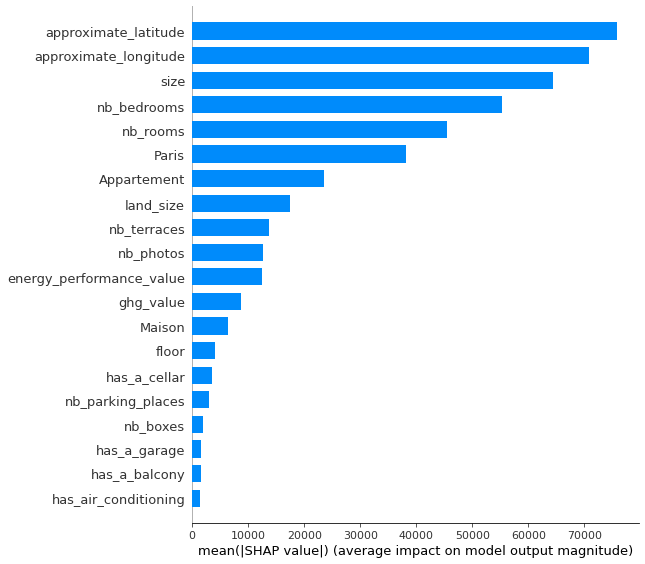

In [15]:
# Feature importance
shap.summary_plot(shap_values, X, plot_type='bar')

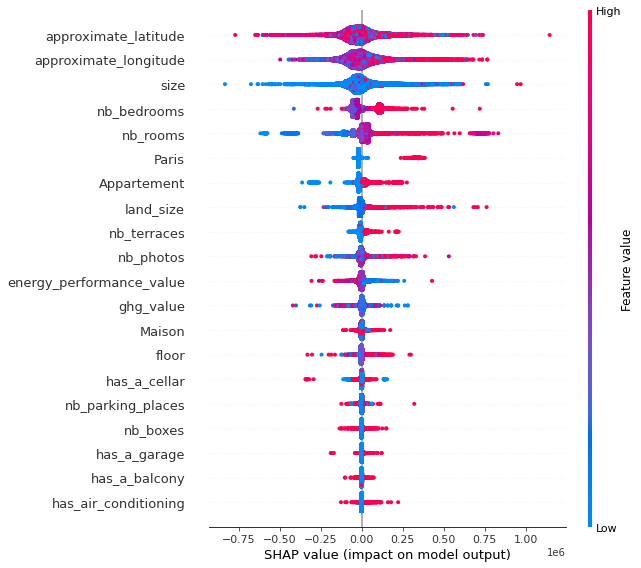

In [8]:
shap.summary_plot(shap_values, X)